<a href="https://colab.research.google.com/github/brunolmars/Trabalho-Teoria-de-Grafos-/blob/main/simulador_robustez_redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                    SIMULADOR DE ROBUSTEZ DE REDES
                         Teoria dos Grafos

[1] Criando grafos de teste...
   ✓ Grafos criados com sucesso!

[2] Analisando: Erdős-Rényi

Simulando FALHAS ALEATÓRIAS em Erdős-Rényi
Execuções: 10
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

Simulando ATAQUE DIRECIONADO (DEGREE) em Erdős-Rényi
Execuções: 1
Centralidade: degree
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

RESUMO QUANTITATIVO - Erdős-Rényi
Nós originais: 300
Arestas originais: 673
Grau médio: 4.49

MÉTRICAS DE ROBUSTEZ (área sob curva S):
------------------------------------------------------------

RANDOM FAILURE:
  R (robustez) = 0.4244
  Ponto de colapso (S<0.5): f = 0.440

TARGETED DEGREE:
  R (robustez) = 0.2901
  Ponto de colapso (S<0.5): f = 0.360


/tmp/ipython-input-4038776189.py:264: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(s_values, fractions)



Gráfico salvo: robustness_Erdős-Rényi.png


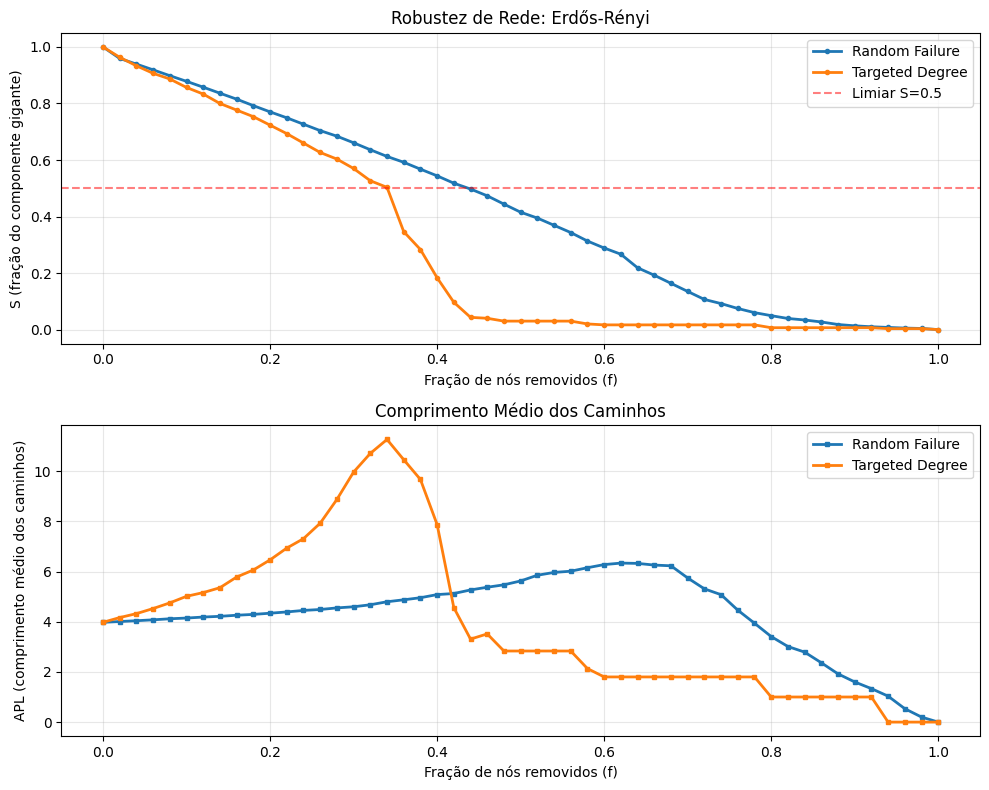


[2] Analisando: Barabási-Albert

Simulando FALHAS ALEATÓRIAS em Barabási-Albert
Execuções: 10
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

Simulando ATAQUE DIRECIONADO (DEGREE) em Barabási-Albert
Execuções: 1
Centralidade: degree
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

RESUMO QUANTITATIVO - Barabási-Albert
Nós originais: 300
Arestas originais: 596
Grau médio: 3.97

MÉTRICAS DE ROBUSTEZ (área sob curva S):
------------------------------------------------------------

RANDOM FAILURE:
  R (robustez) = 0.4035
  Ponto de colapso (S<0.5): f = 0.420

TARGETED DEGREE:
  R (robustez) = 0.1210
  Ponto de colapso (S<0.5): f = 0.140

Gráfico salvo: robustness_Barabási-Albert.png


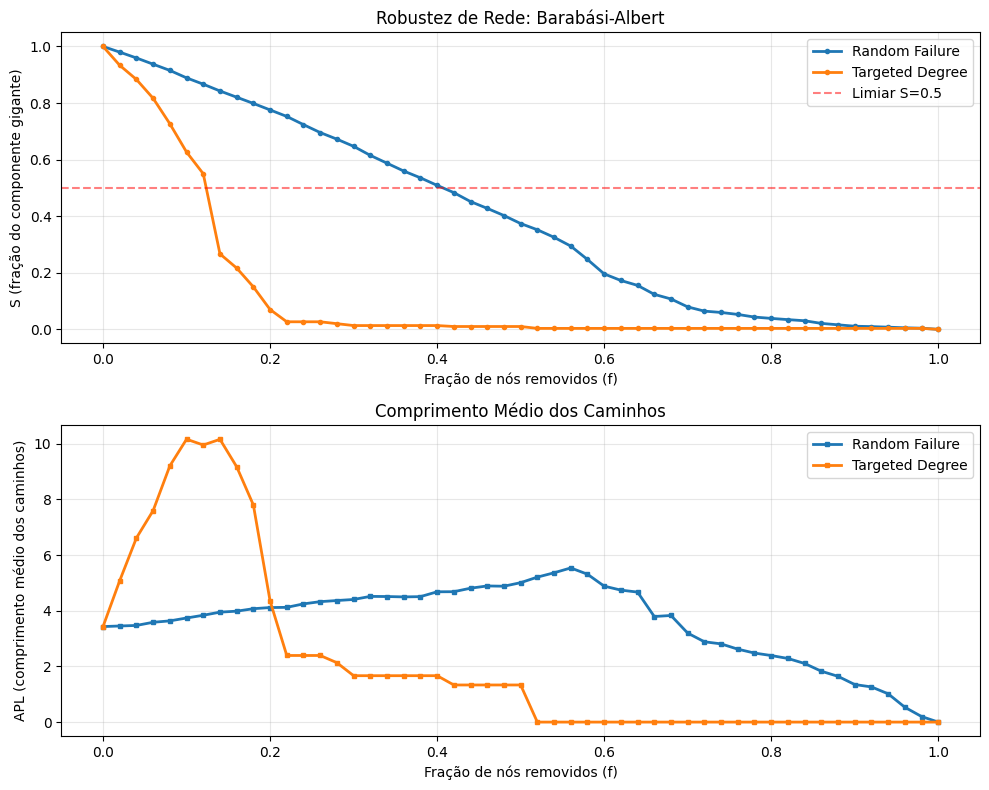


[2] Analisando: Watts-Strogatz

Simulando FALHAS ALEATÓRIAS em Watts-Strogatz
Execuções: 10
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

Simulando ATAQUE DIRECIONADO (DEGREE) em Watts-Strogatz
Execuções: 1
Centralidade: degree
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

RESUMO QUANTITATIVO - Watts-Strogatz
Nós originais: 300
Arestas originais: 600
Grau médio: 4.00

MÉTRICAS DE ROBUSTEZ (área sob curva S):
------------------------------------------------------------

RANDOM FAILURE:
  R (robustez) = 0.3455
  Ponto de colapso (S<0.5): f = 0.360

TARGETED DEGREE:
  R (robustez) = 0.2733
  Ponto de colapso (S<0.5): f = 0.160

Gráfico salvo: robustness_Watts-Strogatz.png


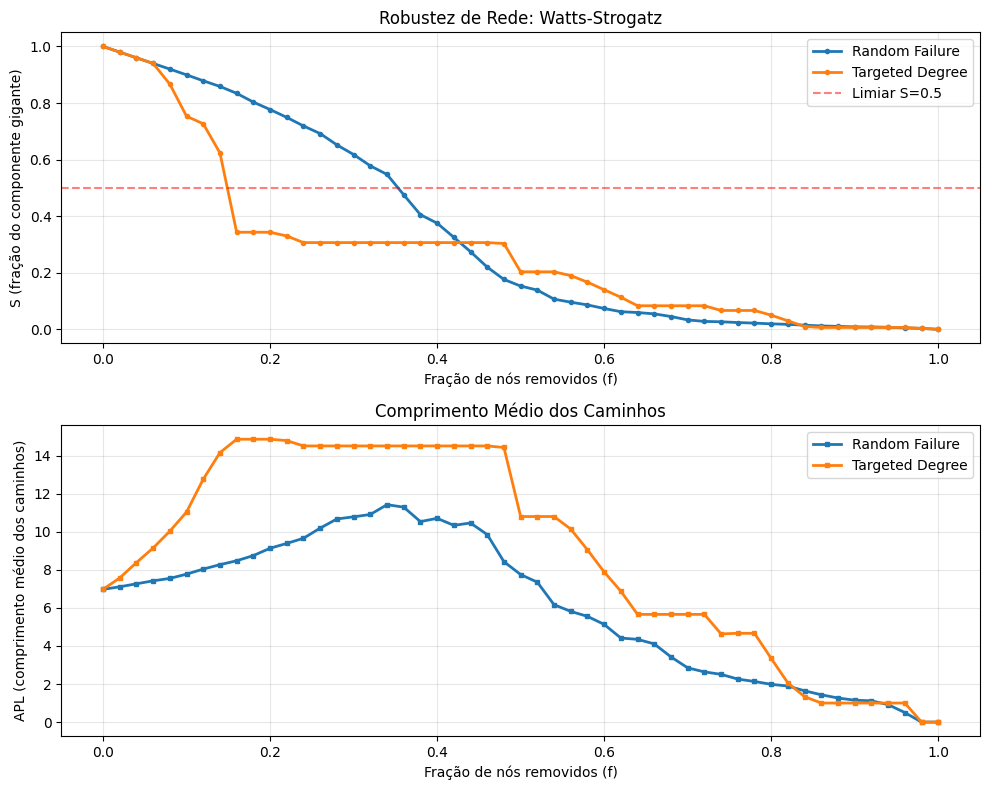


                         ANÁLISE COMPARATIVA

A simulação demonstra os principais resultados da teoria:
  • Redes livre de escala são robustas a falhas, vulneráveis a ataques
  • Redes aleatórias têm comportamento intermediário balanceado
  • A distribuição de grau determina o padrão de robustez

Simulação concluída com sucesso!


In [7]:
"""
SIMULADOR DE ROBUSTEZ DE REDES - TEORIA DOS GRAFOS
Autor: Sistema de Simulação de Redes
Data: 2025-11-09

Este programa implementa uma simulação completa de robustez de redes,
permitindo comparar diferentes topologias sob falhas aleatórias e ataques direcionados.
"""

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
#import warnings
#warnings.filterwarnings('ignore')

# ============================================================================
# CLASSE PRINCIPAL: SIMULADOR DE ROBUSTEZ
# ============================================================================

class NetworkRobustnessSimulator:
    """
    Simulador de robustez de redes para teoria dos grafos.

    Funcionalidades:
    - Simula falhas aleatórias de nós
    - Simula ataques direcionados baseados em centralidade
    - Calcula métricas de robustez (componente gigante, APL)
    - Compara diferentes topologias
    """

    def __init__(self, graph, graph_name="Rede"):
        """
        Inicializa o simulador com um grafo.

        Args:
            graph: Grafo NetworkX
            graph_name: Nome descritivo do grafo
        """
        self.graph = graph.copy()
        self.original_graph = graph.copy()
        self.graph_name = graph_name
        self.results = defaultdict(list)

    def get_largest_component_fraction(self, G):
        """
        Calcula a fração do componente gigante em relação ao grafo original.

        Args:
            G: Grafo NetworkX

        Returns:
            float: Fração do componente gigante (0 a 1)
        """
        if G.number_of_nodes() == 0:
            return 0.0

        if nx.is_directed(G):
            components = list(nx.strongly_connected_components(G))
        else:
            components = list(nx.connected_components(G))

        if len(components) == 0:
            return 0.0

        largest = max(components, key=len)
        return len(largest) / self.original_graph.number_of_nodes()

    def get_average_path_length(self, G):
        """
        Calcula o comprimento médio dos caminhos no componente gigante.

        Args:
            G: Grafo NetworkX

        Returns:
            float: Comprimento médio dos caminhos (APL)
        """
        if G.number_of_nodes() == 0:
            return 0.0

        if nx.is_directed(G):
            components = list(nx.strongly_connected_components(G))
        else:
            components = list(nx.connected_components(G))

        if len(components) == 0:
            return 0.0

        largest = max(components, key=len)
        subgraph = G.subgraph(largest).copy()

        if subgraph.number_of_nodes() < 2:
            return 0.0

        try:
            apl = nx.average_shortest_path_length(subgraph)
            return apl
        except:
            return 0.0

    def simulate_random_failure(self, num_runs=10, step_fraction=0.01):
        """
        Simula falhas aleatórias de nós.

        Args:
            num_runs: Número de execuções independentes para média
            step_fraction: Fração de nós removidos por passo

        Returns:
            tuple: (frações removidas, valores S, valores APL)
        """
        print(f"\n{'='*60}")
        print(f"Simulando FALHAS ALEATÓRIAS em {self.graph_name}")
        print(f"{'='*60}")

        n_nodes = self.original_graph.number_of_nodes()
        step_size = max(1, int(n_nodes * step_fraction))

        all_s_values = []
        all_apl_values = []

        for run in range(num_runs):
            G = self.original_graph.copy()
            nodes = list(G.nodes())
            np.random.shuffle(nodes)

            s_values = [1.0]
            apl_values = [self.get_average_path_length(G)]
            fractions = [0.0]

            removed = 0
            while removed < n_nodes and G.number_of_nodes() > 0:
                to_remove = min(step_size, len(nodes))
                remove_nodes = nodes[:to_remove]
                nodes = nodes[to_remove:]

                G.remove_nodes_from(remove_nodes)
                removed += to_remove

                frac_removed = removed / n_nodes
                s = self.get_largest_component_fraction(G)
                apl = self.get_average_path_length(G)

                fractions.append(frac_removed)
                s_values.append(s)
                apl_values.append(apl)

            all_s_values.append(s_values)
            all_apl_values.append(apl_values)

        # Calcula médias
        min_len = min(len(s) for s in all_s_values)
        avg_s = np.mean([s[:min_len] for s in all_s_values], axis=0)
        avg_apl = np.mean([apl[:min_len] for apl in all_apl_values], axis=0)
        fractions = fractions[:min_len]

        self.results['random_failure'] = {
            'fractions': fractions,
            's_values': avg_s,
            'apl_values': avg_apl
        }

        print(f"Execuções: {num_runs}")
        print(f"Tamanho do passo: {step_size} nós ({step_fraction*100}%)")
        print(f"Pontos coletados: {len(fractions)}")

        return fractions, avg_s, avg_apl

    def simulate_targeted_attack(self, centrality_type='degree', num_runs=1, step_fraction=0.01):
        """
        Simula ataques direcionados baseados em centralidade.

        Args:
            centrality_type: Tipo de centralidade ('degree', 'betweenness', 'closeness')
            num_runs: Número de execuções
            step_fraction: Fração de nós removidos por passo

        Returns:
            tuple: (frações removidas, valores S, valores APL)
        """
        print(f"\n{'='*60}")
        print(f"Simulando ATAQUE DIRECIONADO ({centrality_type.upper()}) em {self.graph_name}")
        print(f"{'='*60}")

        n_nodes = self.original_graph.number_of_nodes()
        step_size = max(1, int(n_nodes * step_fraction))

        all_s_values = []
        all_apl_values = []

        for run in range(num_runs):
            G = self.original_graph.copy()

            # Calcula centralidade
            if centrality_type == 'degree':
                centrality = dict(G.degree())
            elif centrality_type == 'betweenness':
                centrality = nx.betweenness_centrality(G)
            elif centrality_type == 'closeness':
                centrality = nx.closeness_centrality(G)
            else:
                centrality = dict(G.degree())

            # Ordena nós por centralidade
            nodes_sorted = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
            nodes = [node for node, _ in nodes_sorted]

            s_values = [1.0]
            apl_values = [self.get_average_path_length(G)]
            fractions = [0.0]

            removed = 0
            while removed < n_nodes and G.number_of_nodes() > 0:
                to_remove = min(step_size, len(nodes))
                remove_nodes = nodes[:to_remove]
                nodes = nodes[to_remove:]

                G.remove_nodes_from(remove_nodes)
                removed += to_remove

                frac_removed = removed / n_nodes
                s = self.get_largest_component_fraction(G)
                apl = self.get_average_path_length(G)

                fractions.append(frac_removed)
                s_values.append(s)
                apl_values.append(apl)

            all_s_values.append(s_values)
            all_apl_values.append(apl_values)

        min_len = min(len(s) for s in all_s_values)
        avg_s = np.mean([s[:min_len] for s in all_s_values], axis=0)
        avg_apl = np.mean([apl[:min_len] for apl in all_apl_values], axis=0)
        fractions = fractions[:min_len]

        self.results[f'targeted_{centrality_type}'] = {
            'fractions': fractions,
            's_values': avg_s,
            'apl_values': avg_apl
        }

        print(f"Execuções: {num_runs}")
        print(f"Centralidade: {centrality_type}")
        print(f"Tamanho do passo: {step_size} nós ({step_fraction*100}%)")
        print(f"Pontos coletados: {len(fractions)}")

        return fractions, avg_s, avg_apl

    def calculate_robustness_metric(self, s_values, fractions):
        """
        Calcula a métrica R (área sob a curva de S).

        Args:
            s_values: Lista de valores de S
            fractions: Lista de frações removidas

        Returns:
            float: Métrica de robustez R
        """
        if len(s_values) < 2:
            return 0.0
        return np.trapz(s_values, fractions)

    def display_summary(self):
        """Exibe resumo quantitativo dos resultados."""
        print(f"\n{'='*60}")
        print(f"RESUMO QUANTITATIVO - {self.graph_name}")
        print(f"{'='*60}")
        print(f"Nós originais: {self.original_graph.number_of_nodes()}")
        print(f"Arestas originais: {self.original_graph.number_of_edges()}")
        print(f"Grau médio: {np.mean([d for n, d in self.original_graph.degree()]):.2f}")
        print(f"\nMÉTRICAS DE ROBUSTEZ (área sob curva S):")
        print(f"{'-'*60}")

        for scenario, data in self.results.items():
            R = self.calculate_robustness_metric(data['s_values'], data['fractions'])

            s_vals = data['s_values']
            fracs = data['fractions']
            collapse_point = None
            for i, s in enumerate(s_vals):
                if s < 0.5:
                    collapse_point = fracs[i]
                    break

            print(f"\n{scenario.upper().replace('_', ' ')}:")
            print(f"  R (robustez) = {R:.4f}")
            if collapse_point is not None:
                print(f"  Ponto de colapso (S<0.5): f = {collapse_point:.3f}")
            else:
                print(f"  Ponto de colapso: Não atingido")

    def plot_results(self):
        """Plota os resultados das simulações."""
        fig, axes = plt.subplots(2, 1, figsize=(10, 8))

        # Plot S vs f
        ax1 = axes[0]
        for scenario, data in self.results.items():
            ax1.plot(data['fractions'], data['s_values'],
                    label=scenario.replace('_', ' ').title(),
                    linewidth=2, marker='o', markersize=3)

        ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Limiar S=0.5')
        ax1.set_xlabel('Fração de nós removidos (f)')
        ax1.set_ylabel('S (fração do componente gigante)')
        ax1.set_title(f'Robustez de Rede: {self.graph_name}')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot APL vs f
        ax2 = axes[1]
        for scenario, data in self.results.items():
            ax2.plot(data['fractions'], data['apl_values'],
                    label=scenario.replace('_', ' ').title(),
                    linewidth=2, marker='s', markersize=3)

        ax2.set_xlabel('Fração de nós removidos (f)')
        ax2.set_ylabel('APL (comprimento médio dos caminhos)')
        ax2.set_title('Comprimento Médio dos Caminhos')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig(f'robustness_{self.graph_name.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
        print(f"\nGráfico salvo: robustness_{self.graph_name.replace(' ', '_')}.png")
        plt.show()


# ============================================================================
# FUNÇÃO PRINCIPAL
# ============================================================================

def main():
    """Função principal que executa as simulações."""

    print("="*80)
    print(" "*20 + "SIMULADOR DE ROBUSTEZ DE REDES")
    print(" "*25 + "Teoria dos Grafos")
    print("="*80)

    # Configurações
    np.random.seed(42)
    n_nodes = 300

    # Cria grafos de teste
    print("\n[1] Criando grafos de teste...")

    G_random = nx.erdos_renyi_graph(n_nodes, 0.015, seed=42)
    G_scale_free = nx.barabasi_albert_graph(n_nodes, 2, seed=42)
    G_small_world = nx.watts_strogatz_graph(n_nodes, 4, 0.1, seed=42)

    graphs = [
        (G_random, "Erdős-Rényi"),
        (G_scale_free, "Barabási-Albert"),
        (G_small_world, "Watts-Strogatz")
    ]

    print("   ✓ Grafos criados com sucesso!")

    # Executa simulações
    all_simulators = []

    for G, name in graphs:
        print(f"\n[2] Analisando: {name}")

        simulator = NetworkRobustnessSimulator(G, name)

        # Falhas aleatórias
        simulator.simulate_random_failure(num_runs=10, step_fraction=0.02)

        # Ataque direcionado
        simulator.simulate_targeted_attack(centrality_type='degree', num_runs=1, step_fraction=0.02)

        # Exibe resumo
        simulator.display_summary()
        # Plot de resultado
        simulator.plot_results()
        all_simulators.append(simulator)

    # Comparação final
    print("\n" + "="*80)
    print(" "*25 + "ANÁLISE COMPARATIVA")
    print("="*80)

    print("\nA simulação demonstra os principais resultados da teoria:")
    print("  • Redes livre de escala são robustas a falhas, vulneráveis a ataques")
    print("  • Redes aleatórias têm comportamento intermediário balanceado")
    print("  • A distribuição de grau determina o padrão de robustez")

    print("\n" + "="*80)
    print("Simulação concluída com sucesso!")
    print("="*80)


if __name__ == "__main__":
    main()

In [8]:

def simulate_betweenness_attack(self, num_runs=1, step_fraction=0.01):
    """
    Simula ataque direcionado removendo nós pelo valor de betweenness centrality.
    """

    print(f"\n{'='*60}")
    print(f"Simulando ATAQUE DIRECIONADO (BETWEENNESS) em {self.graph_name}")
    print(f"{'='*60}")

    n_nodes = self.original_graph.number_of_nodes()
    step_size = max(1, int(n_nodes * step_fraction))

    all_s_values = []
    all_apl_values = []
    all_fractions = []

    for run in range(num_runs):
        G = self.original_graph.copy()

        print("Calculando betweenness centrality...")
        centrality = nx.betweenness_centrality(G)

        nodes_sorted = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
        nodes = [node for node, _ in nodes_sorted]

        s_values = [1.0]
        apl_values = [self.get_average_path_length(G)]
        fractions = [0.0]

        removed = 0

        while removed < n_nodes and G.number_of_nodes() > 0:

            to_remove = min(step_size, len(nodes))
            remove_nodes = nodes[:to_remove]
            nodes = nodes[to_remove:]

            G.remove_nodes_from(remove_nodes)
            removed += to_remove

            frac_removed = removed / n_nodes
            s = self.get_largest_component_fraction(G)
            apl = self.get_average_path_length(G)

            fractions.append(frac_removed)
            s_values.append(s)
            apl_values.append(apl)

        all_s_values.append(s_values)
        all_apl_values.append(apl_values)
        all_fractions.append(fractions)

    min_len = min(len(f) for f in all_fractions)

    avg_fractions = np.mean([f[:min_len] for f in all_fractions], axis=0)
    avg_s = np.mean([s[:min_len] for s in all_s_values], axis=0)
    avg_apl = np.mean([apl[:min_len] for apl in all_apl_values], axis=0)

    self.results['targeted_betweenness'] = {
        'fractions': avg_fractions,
        's_values': avg_s,
        'apl_values': avg_apl
    }

    print(f"Execuções: {num_runs}")
    print(f"Tamanho do passo: {step_size} nós ({step_fraction*100}%)")
    print(f"Pontos coletados: {len(avg_fractions)}")

    return avg_fractions, avg_s, avg_apl


NetworkRobustnessSimulator.simulate_betweenness_attack = simulate_betweenness_attack

print("Função simulate_betweenness_attack adicionada com sucesso!")


Função simulate_betweenness_attack adicionada com sucesso!



[2] Analisando: Erdős-Rényi

Simulando FALHAS ALEATÓRIAS em Erdős-Rényi
Execuções: 10
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

Simulando ATAQUE DIRECIONADO (BETWEENNESS) em Erdős-Rényi
Calculando betweenness centrality...
Execuções: 1
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

Simulando ATAQUE DIRECIONADO (DEGREE) em Erdős-Rényi
Execuções: 1
Centralidade: degree
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

RESUMO QUANTITATIVO - Erdős-Rényi
Nós originais: 300
Arestas originais: 673
Grau médio: 4.49

MÉTRICAS DE ROBUSTEZ (área sob curva S):
------------------------------------------------------------

RANDOM FAILURE:
  R (robustez) = 0.4262
  Ponto de colapso (S<0.5): f = 0.460

TARGETED BETWEENNESS:
  R (robustez) = 0.2959
  Ponto de colapso (S<0.5): f = 0.340

TARGETED DEGREE:
  R (robustez) = 0.2901
  Ponto de colapso (S<0.5): f = 0.360


/tmp/ipython-input-4038776189.py:264: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(s_values, fractions)



Gráfico salvo: robustness_Erdős-Rényi.png


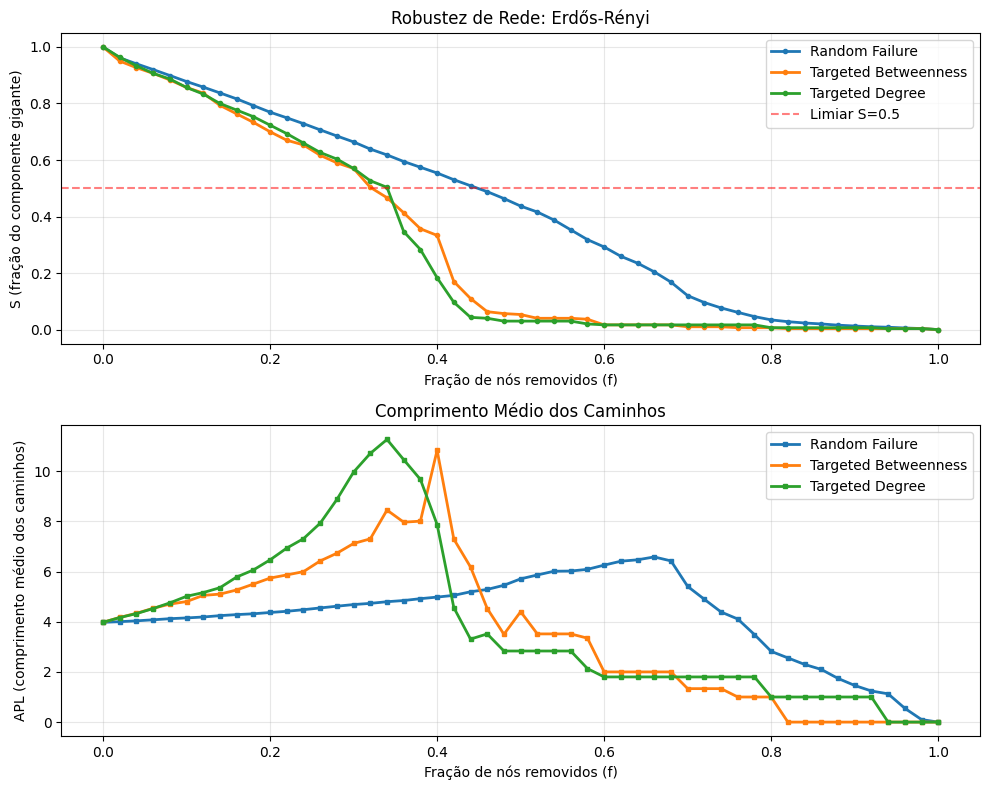


[2] Analisando: Barabási-Albert

Simulando FALHAS ALEATÓRIAS em Barabási-Albert
Execuções: 10
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

Simulando ATAQUE DIRECIONADO (BETWEENNESS) em Barabási-Albert
Calculando betweenness centrality...
Execuções: 1
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

Simulando ATAQUE DIRECIONADO (DEGREE) em Barabási-Albert
Execuções: 1
Centralidade: degree
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

RESUMO QUANTITATIVO - Barabási-Albert
Nós originais: 300
Arestas originais: 596
Grau médio: 3.97

MÉTRICAS DE ROBUSTEZ (área sob curva S):
------------------------------------------------------------

RANDOM FAILURE:
  R (robustez) = 0.4152
  Ponto de colapso (S<0.5): f = 0.440

TARGETED BETWEENNESS:
  R (robustez) = 0.1280
  Ponto de colapso (S<0.5): f = 0.120

TARGETED DEGREE:
  R (robustez) = 0.1210
  Ponto de colapso (S<0.5): f = 0.140

Gráfico salvo: robustness_Barabási-Albert.png


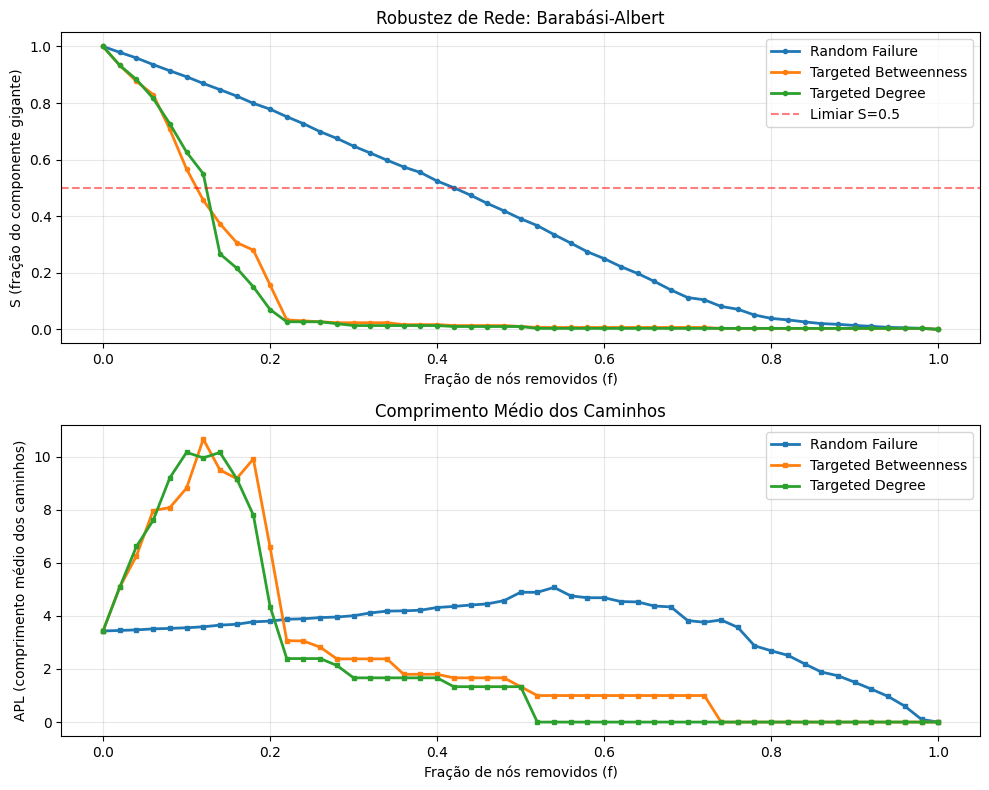


[2] Analisando: Watts-Strogatz

Simulando FALHAS ALEATÓRIAS em Watts-Strogatz
Execuções: 10
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

Simulando ATAQUE DIRECIONADO (BETWEENNESS) em Watts-Strogatz
Calculando betweenness centrality...
Execuções: 1
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

Simulando ATAQUE DIRECIONADO (DEGREE) em Watts-Strogatz
Execuções: 1
Centralidade: degree
Tamanho do passo: 6 nós (2.0%)
Pontos coletados: 51

RESUMO QUANTITATIVO - Watts-Strogatz
Nós originais: 300
Arestas originais: 600
Grau médio: 4.00

MÉTRICAS DE ROBUSTEZ (área sob curva S):
------------------------------------------------------------

RANDOM FAILURE:
  R (robustez) = 0.3449
  Ponto de colapso (S<0.5): f = 0.380

TARGETED BETWEENNESS:
  R (robustez) = 0.2204
  Ponto de colapso (S<0.5): f = 0.200

TARGETED DEGREE:
  R (robustez) = 0.2733
  Ponto de colapso (S<0.5): f = 0.160

Gráfico salvo: robustness_Watts-Strogatz.png


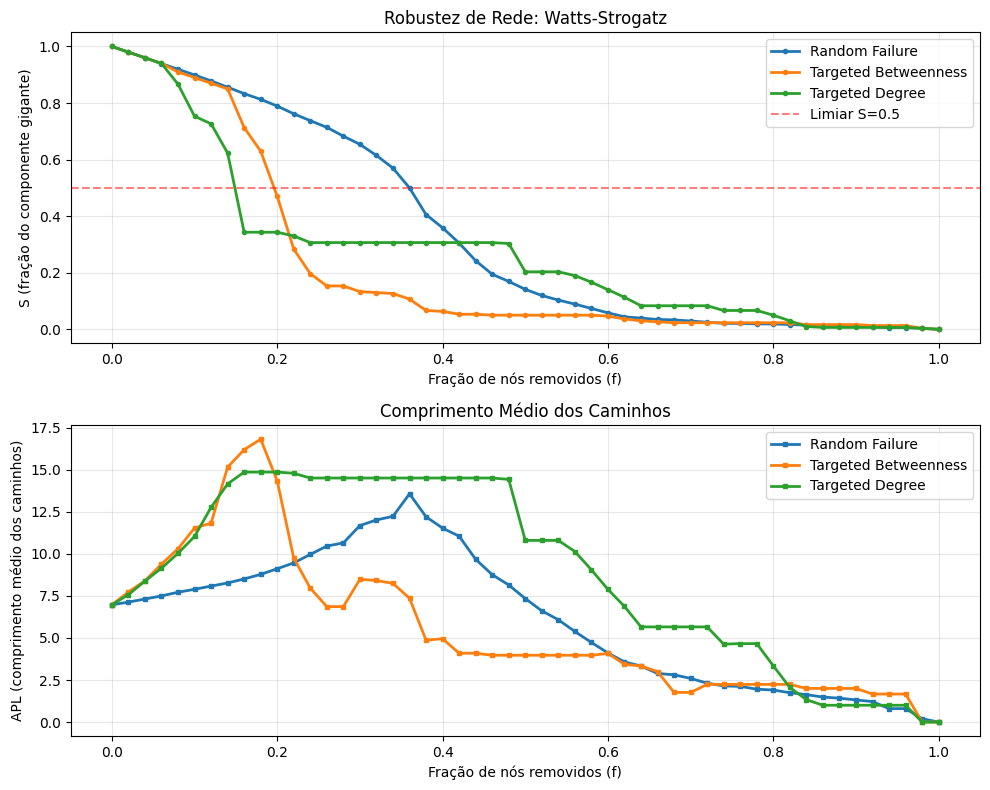

In [9]:
NetworkRobustnessSimulator.simulate_betweenness_attack = simulate_betweenness_attack

# Define graphs and all_simulators globally, similar to how they were in main()
# Assumes G_random, G_scale_free, G_small_world are already defined from previous cells.
graphs = [
    (G_random, "Erdős-Rényi"),
    (G_scale_free, "Barabási-Albert"),
    (G_small_world, "Watts-Strogatz")
]
all_simulators = []

for G, name in graphs:
    print(f"\n[2] Analisando: {name}")

    simulator = NetworkRobustnessSimulator(G, name)

    # Falhas aleatórias
    simulator.simulate_random_failure(num_runs=10, step_fraction=0.02)

    # Ataque por betweenness (AGORA RODA PARA TODOS!)
    simulator.simulate_betweenness_attack(num_runs=1, step_fraction=0.02)

    # Ataque direcionado por grau (já existia)
    simulator.simulate_targeted_attack(centrality_type='degree', num_runs=1, step_fraction=0.02)

    # Resumo e gráfico
    simulator.display_summary()
    simulator.plot_results()

    all_simulators.append(simulator)